<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-10
# DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments
# module1-statistics-probability-and-inference/

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were **180 (5 std)** and **178.5 (4.25 std)** seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisited
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [2]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# np.std(ddof)
# ddof : int, optional
#     Means Delta Degrees of Freedom.  The divisor used in calculations
#     is ``N - ddof``, where ``N`` represents the number of elements.
#     By default `ddof` is zero.

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

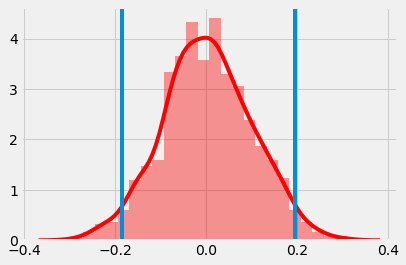

In [6]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0) # 95% confidence interval
ax.axvline(np.percentile(sample,2.5),0)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way **to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean.** 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially **a distribution of means of normaly distributed data**. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.standard_t.html

In [0]:
# np.random.standard_t()
# Draw samples from a standard Student’s t distribution with df degrees of freedom.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

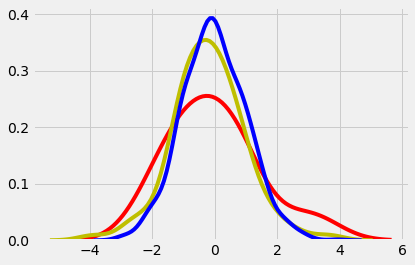

In [10]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

https://seaborn.pydata.org/generated/seaborn.distplot.html  
https://seaborn.pydata.org/examples/distplot_options.html  

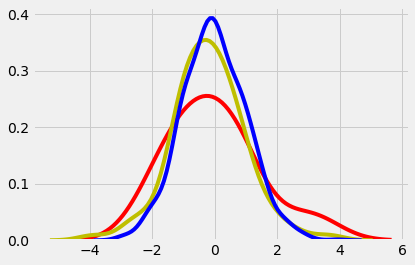

In [11]:
sns.distplot(t_df10, hist=False, color='r');
sns.distplot(t_df100, hist=False, color='y');
sns.distplot(t_df1000, hist=False, color='b');

In [12]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.017103745947491977
Standard Deviation: 1.367922015079589
Variance: 1.871210639339403
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.18908961904531257
Standard Deviation: 1.1583837605815073
Variance: 1.3418529367789547
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.01507704458147104
Standard Deviation: 1.0283046188055018
Variance: 1.0574103890567286


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but **the t-distribution is much more useful in many real-world situations.**

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

from scipy.stats import ttest_ind, 
                        ttest_ind_from_stats, 
                        ttest_rel

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html  
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
> Calculate the T-test for the means of two independent samples of scores.
> This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html  
> T-test for means of two independent samples from descriptive statistics.
> This is a two-sided test for the null hypothesis that two independent samples have identical average (expected) values.  

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html  
> Calculates the T-test on TWO RELATED samples of scores, a and b.
> This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.

## Pancake Experiment

In [0]:
mu1 = 180 # mean
sigma1 = 5 # standard deviation
sample1 = np.random.normal(mu1, sigma1, 1000)

mu2 = 178.5 # mean
sigma2 = 4.25 # standard deviation
sample2 = np.random.normal(mu2, sigma2, 800)

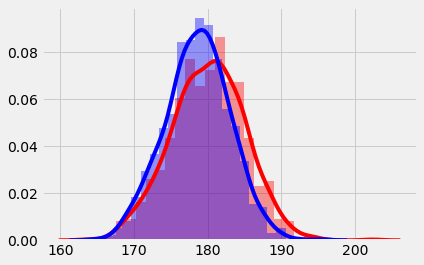

In [17]:
sns.distplot(sample1, color='r');
sns.distplot(sample2, color='b');

**Returns** 

statisticfloat or array  
The calculated t-statistic.  

pvaluefloat or array  
The two-tailed p-value.  

In [18]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=6.418769987896774, pvalue=1.752898705972345e-10)

https://en.wikipedia.org/wiki/T-statistic  
In statistics, the t-statistic is **the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error**. It is used in hypothesis testing via Student's t-test. For example, it is used in estimating the population mean from a sampling distribution of sample means if the population standard deviation is unknown.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means